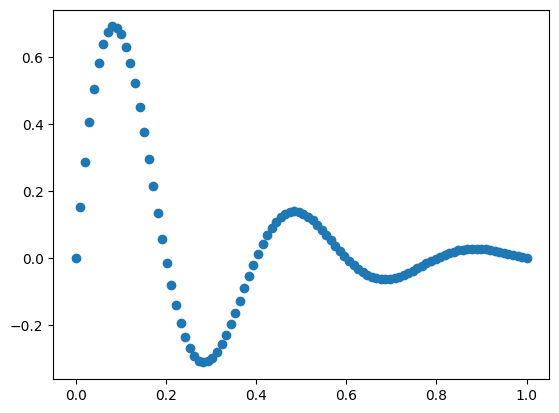

In [2]:
import jax.numpy as jnp
import random
import matplotlib.pyplot as plt

X = jnp.linspace(0,1,100)

y = (jnp.sin(5 * X * jnp.pi) * jnp.exp(-4 * X)) / pow(10,0)

plt.scatter(X,y)

In [4]:
import jax.numpy as jnp

def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def predict(W, b, inputs):
    return sigmoid(jnp.dot(inputs, W) + b)

def loss(W, b, inputs, targets):
    preds = predict(W, b, inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -jnp.mean(jnp.log(label_probs))

In [14]:
from jax import grad

def train_step(W, b, X, y, learning_rate):
    Wb_grad = grad(loss)(W, b, X, y)
    W -= learning_rate * Wb_grad[0]
    b -= learning_rate * Wb_grad[1]
    return W,b

def fit(W, b, X, y, epochs=5000, learning_rate = 1e-2):
    for _ in range(epochs):
        W, b = train_step(W, b, X, y, learning_rate)
    return W,b

In [15]:
from sklearn.metrics import roc_auc_score


def validate_model(W, b, X_test, y_test):
    y_pred = predict(W, b, X_test)
    return roc_auc_score(y_test, y_pred)

In [16]:
lens = len(X)
W = jnp.zeros((lens,0))
b = 0.

W, b = fit(W, b, X, y)

auc = validate_model(W, b, X, y)
print(f"auc:{auc}")


TypeError: mul got incompatible shapes for broadcasting: (0,), (100,).